How well do jobs and skills pay for Data Analysts?

Methodology:
1. Evaluate median salary for top 6 Data related roles in India
2. Find median salaries per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills


In [2]:
# Importing Libraries
import ast
import pandas as pd 
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Data Cleanup
def clean_list(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)
    else:
        return
    
df['job_skills'] = df['job_skills'].apply(clean_list)

/Users/AribM/Python_DA/dlt/.conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
df_IND = df[df['job_country'] == 'India'].dropna(subset = 'salary_year_avg').copy()

In [25]:
df_IND.sort_values('salary_year_avg',ascending=False,inplace=True)

In [26]:
job_titles = df_IND['job_title_short'].value_counts().index[:6].to_list()
job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

In [27]:
df_IND_top6 = df_IND[df_IND['job_title_short'].isin(job_titles)].copy()
job_order = df_IND_top6.groupby(by='job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
job_order

Index(['Data Engineer', 'Senior Data Engineer', 'Data Scientist',
       'Data Analyst', 'Machine Learning Engineer', 'Software Engineer'],
      dtype='object', name='job_title_short')

Text(0.5, 0, 'Median Salary ($USD)')

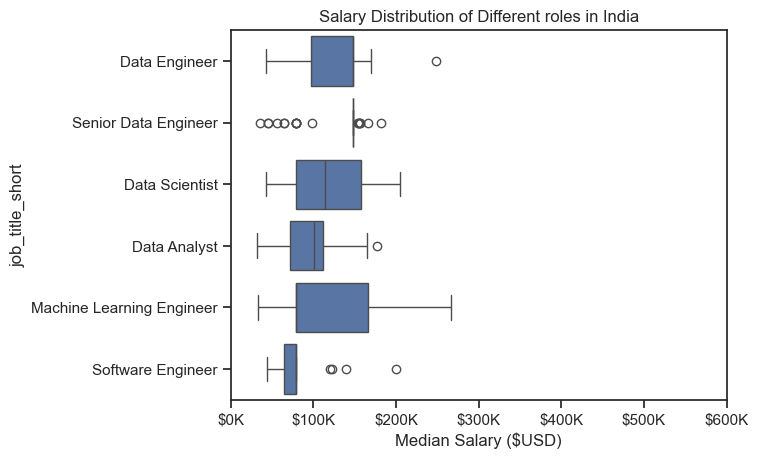

In [106]:
sns.boxplot(data=df_IND_top6,x='salary_year_avg',y='job_title_short',order=job_order)
sns.set_theme(style='ticks')
plt.xlim(0,600000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))
plt.title('Salary Distribution of Different roles in India')
plt.xlabel('Median Salary ($USD)')

Investigate Median Salary vs Skill for Data Analysts

In [98]:
df_DA_IND = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()
df_DA_IND = df_DA_IND.dropna(subset='salary_year_avg')

In [99]:
skills_exploded = df_DA_IND.explode('job_skills').copy()


In [100]:
top_paid_skills = skills_exploded.groupby(by='job_skills').agg(
    count = ('job_skills','count'),
    median_salary = ('salary_year_avg','median')).sort_values('median_salary',ascending=False).head(10)

In [101]:
top_paid_skills

,count,median_salary
job_skills,,
postgresql,1,165000.0
pyspark,1,165000.0
gitlab,1,165000.0
linux,1,165000.0
mysql,1,165000.0
gdpr,2,163782.0
mongodb,6,163782.0
scala,3,163782.0
neo4j,1,163782.0


In [102]:
most_demanded_skills = skills_exploded.groupby(by='job_skills').agg(
    count = ('job_skills','count'),
    median_salary = ('salary_year_avg','median')).sort_values('count',ascending=False).head(10)


In [103]:
most_demanded_skills.sort_values('median_salary',ascending=False,inplace=True)
most_demanded_skills


,count,median_salary
job_skills,,
power bi,17,111175.0
spark,11,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


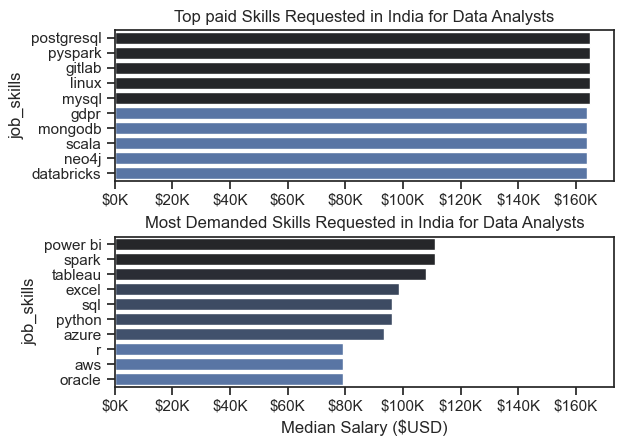

In [104]:
fig,ax = plt.subplots(2,1)
sns.set_theme(style='ticks')
sns.barplot(data = top_paid_skills,x='median_salary',y='job_skills',ax= ax[0],hue = 'median_salary',palette='dark:b_r')
ax[0].set_title('Top paid Skills Requested in India for Data Analysts')
ax[0].legend().set_visible(False)
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))

sns.barplot(data = most_demanded_skills,x='median_salary',y='job_skills',ax= ax[1],hue = 'median_salary',palette='dark:b_r')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))
ax[1].set_title('Most Demanded Skills Requested in India for Data Analysts')
ax[1].legend().set_visible(False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_xlabel('Median Salary ($USD)')
fig.suptitle('')
fig.tight_layout(h_pad = 0.5)